## Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well as Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

## Step 2:
Data Uploading using Pandas Function


In [2]:
#Load the dataset
url = 'https://raw.githubusercontent.com/vinnithakur/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv '
df = pd.read_csv(url, sep=",")
df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
765,385.0,0.0,0.0,186.0,0.0,966.0,763.0,7,23.22
155,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
825,397.0,0.0,0.0,185.0,0.0,1040.0,734.0,28,39.09
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33
869,322.0,0.0,116.0,196.0,10.0,818.0,813.0,28,31.18
...,...,...,...,...,...,...,...,...,...
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.90
229,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3,18.00
689,157.0,236.0,0.0,192.0,0.0,935.4,781.2,7,16.89
252,250.0,0.0,95.7,187.4,5.5,956.9,861.2,56,38.33


## Step 3:
Doing Exploratory Data Analysis [EDA]  :-->

1. Univariate Analysis

2. Bivariate Analysis

In [3]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type' : df[i].dtype,
        'Missing Values' : df[i].isnull().sum(),
        'Unique Values' : df[i].nunique(),
        'Mode' : df[i].mode().values[0],
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Standard Deviation' : df[i].std(),
        'Kurtosis' : df[i].kurtosis(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    
    stats.append(numerical_stats)
    
df_stats = pd.DataFrame(stats)
df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Standard Deviation', 'Kurtosis', 'IQR'], cmap='Reds')

,Feature,Type,Missing Values,Unique Values,Mode,Mean,Median,Standard Deviation,Kurtosis,IQR
0,cement,float64,0,278,362.600000,281.167864,272.900000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,73.895825,22.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,54.188350,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,192.000000,181.567282,185.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.204660,6.400000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,972.918932,968.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,773.580485,779.500000,80.175980,-0.102177,93.050000
7,age,int64,0,14,28.000000,45.662136,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,35.817961,34.445000,16.705742,-0.313725,22.425000


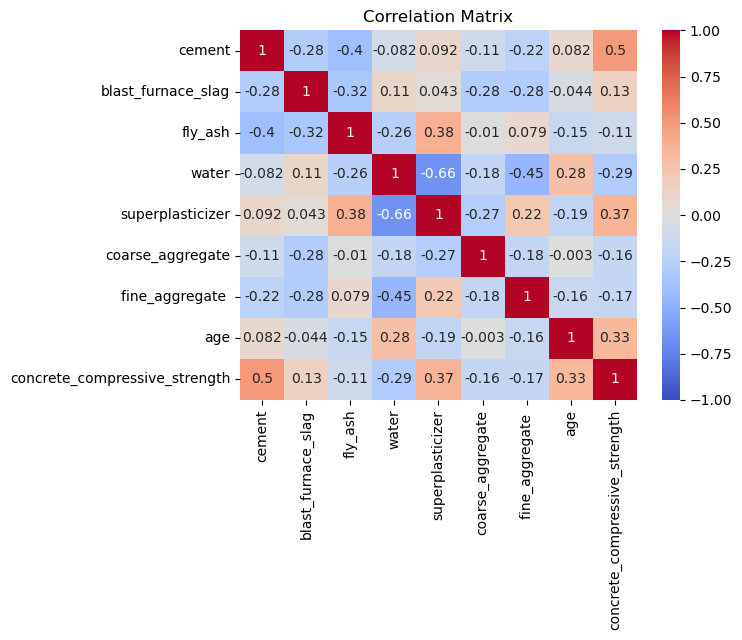

In [4]:
# Checking Correlation Matrix 
# X = Independent Variables
# y = Dependent  Variable  ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=True,center=0, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and Create New Feature Based on Existing Feature ---> Feature Engineering
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [6]:
df['Composite_Ratio'] = (df['cement'] + df['superplasticizer']+ df['blast_furnace_slag'])/ (df['water'])

In [7]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.723958
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2.033599


In [8]:
df['cement_to_water_ratio'] = df['cement'] / df['water']

In [9]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.348765,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.348765,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2.083333,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2.083333,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.723958,1.034375
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2.234410,1.538976
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.696939,1.643878
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.525688,0.770628
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2.033599,0.906036


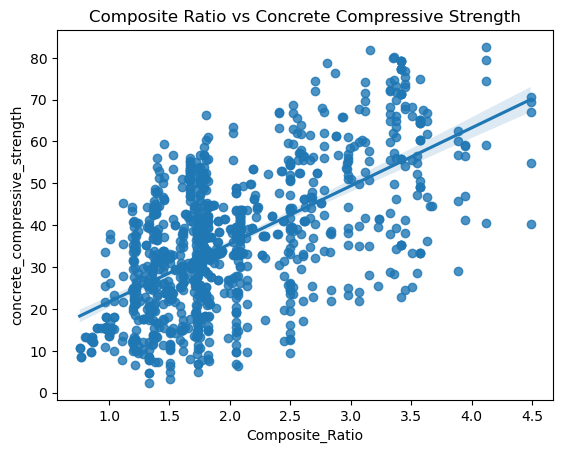

In [11]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

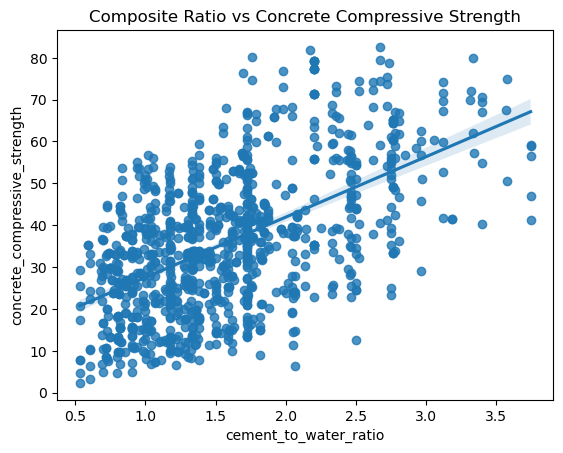

In [12]:
sns.regplot(x = df['cement_to_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

## Step 4: 
Splitting the dataset into training and testing sets.
Also using Train and Test Split to Prevent Data Leakage

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Using Scaling Technique

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X

In [18]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
r2_score_LR = r2_score(y_test, y_pred_LR)
r2_score_LR

0.5941935306287764